In [1]:
from __future__ import print_function, division, absolute_import
import os,sys
import numpy as np
from scipy.linalg import inv, block_diag
import time
from joblib import Parallel, delayed
import gudhi
sys.path.insert(0, "C:\\Users\\matt\\Desktop\\orbithunter\\")
from orbithunter import *
from mpl_toolkits.mplot3d.axes3d import *
import matplotlib.pyplot as plt
import itertools
from gudhi.hera import wasserstein_distance, bottleneck_distance
import glob

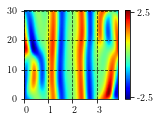

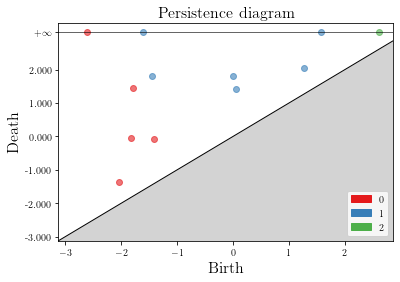

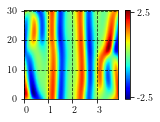

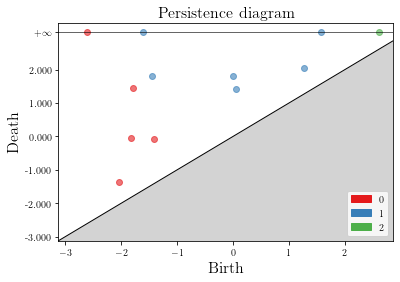

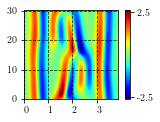

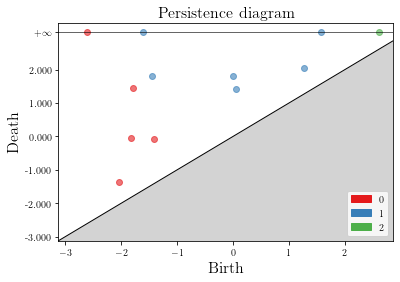

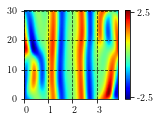

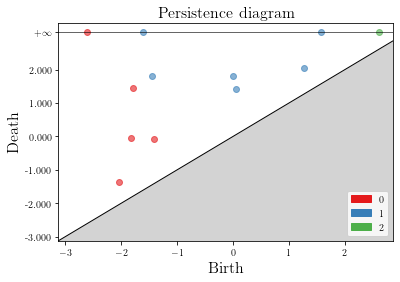

0.0
1.8056736661442585e-14
1.565327728547672e-14
2.864375403532904e-14


In [80]:
persistences = []
sr = read_h5('ShiftReflectionOrbitKS_L34p465_T30p451.h5')
group_orbit = [sr, sr.reflection(), sr.cell_shift(axis=1), sr.cell_shift().reflection()]
for orbit in group_orbit:
    orbit.plot(fundamental_domain=False)
#     pcc = orbit_periodic_cubical_complex(orbit)
    ps = orbit_persistence(orbit, min_persistence=0.5)
    persistences.append([p[-1] for p in ps])
    gudhi_plot(ps, legend=True)
    
for g in group_orbit:
    print(gudhi_distance(group_orbit[0], g, metric='wasserstein'))

In [12]:
?gudhi_plot

In [81]:
orbit_list = []
for orbit_h5 in glob.glob('../../data/local/continuation/merge_tile_coarse/*.h5'):
    orbit_list.append(read_h5(os.path.basename(orbit_h5), directory='../data/local/continuation/merge_tile_coarse/'))

In [82]:
orbit1 = read_h5('RelativeOrbitKS_L13p093_T9p100.h5', directory='../data/local/continuation/merge_tile/')
orbit2 =  read_h5('RelativeOrbitKS_L12p997_T22p702.h5', directory='../data/local/continuation/merge_tile/')

In [ ]:
from orbithunter.gluing import tile_dictionary_ks
td = tile_dictionary_ks(padded=False, comoving=False)

td[0].plot()

td[1].plot()

td[2].plot()

tile_dictionary = rediscretize_tiling_dictionary(td, new_shape=(16,16))

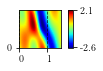

In [83]:
orbit1.plot()

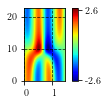

In [84]:
orbit2.plot()

In [85]:
pcc1 = orbit_persistence(orbit1, min_persistence=0.5)
pcc2 = orbit_persistence(orbit2, min_persistence=0.5)

In [86]:
orbit_list[0].L, orbit_list[-1].L

(12.676959074242161, 13.10028765679849)

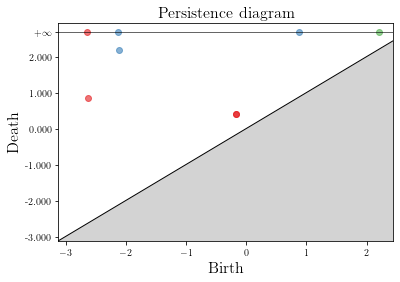

In [87]:
gudhi_plot(pcc1)

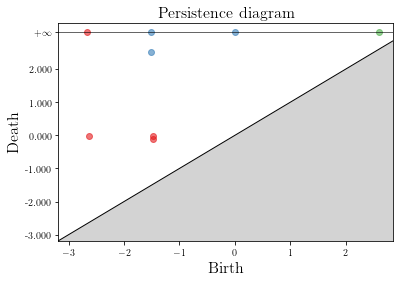

In [88]:
gudhi_plot(pcc2)

In [89]:
wd_list_bd = []
for orbit1, orbit2 in np.array(list(itertools.product(orbit_list, orbit_list))):
    wd_list_bd.append(gudhi_distance(orbit1, orbit2, metric='bottleneck'))

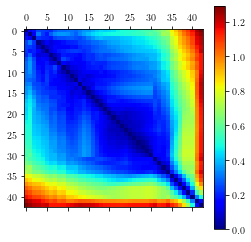

In [90]:
plt.matshow(np.reshape(wd_list_bd, (int(np.sqrt(len(wd_list_bd))), -1)), cmap='jet')
plt.colorbar()
plt.show()

The block diagonal structure is an indication that orbits indexed from 0 ~ 35 are 'closer' to each other than those indexed
from 35-...

Possible applications: bifurcation detection, identifying orbits, symbolic dynamics detection.

In [91]:
wd_list = []
for orbit1, orbit2 in np.array(list(itertools.product(orbit_list, orbit_list))):
    wd_list.append(gudhi_distance(orbit1, orbit2, metric='wasserstein'))

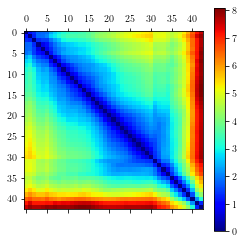

In [92]:
plt.matshow(np.reshape(wd_list, (int(np.sqrt(len(wd_list))), -1)), cmap='jet')
plt.colorbar()
plt.show()

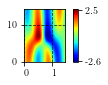

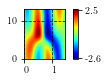

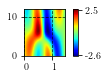

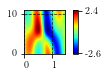

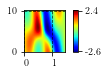

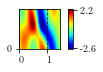

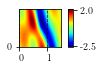

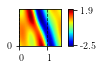

In [93]:
for o in orbit_list[35:]:
    o.plot()
# orbit_list[35].plot(), orbit_list[-1].plot()

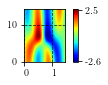

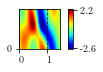

(None, None)

In [94]:
orbit_list[35].plot(), orbit_list[40].plot()